# [Intro to Spatial Vector Data in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/)
## Vector Data in Python
Shapefile format is often used to store Geospatial data in vector format. Each shapefile can only store one vector type, either points, lines or polygons Because their structure is different. 

Objects in a shapefile ccan have a set of associated attributes that describe them. For example, a line shapefile that contains the locations of streets, can also contain the associated street name, type of street, length, speed limit, number of lanes and other information about each street line object.

In [32]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
#Enable 2x images
%config InlineBackend.figure_format = 'retina'

# Get data and set working directory (This will change the working directory)
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# type(data)

### Shapefile Structure
Shapefiles have 3 key files associated with them:

* .shp: contains the geometry for all features.
* .shx: indexes the geometry.
* .dbf: stores feature attributes in a tabular format.
These files should be named the same and be located in the same directory.

A shapefile can have other associated files including:

* .prj: plain text. Describes the projections using well-known text format (WKT). Includes the coordinate system and projection information. 
* .sbn and .sbx: spatial index of the features.
* .shp.xml: geospatial metadata in XML format, (e.g. XML format or ISO 19115).

In [13]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")
# .shp: the file that contains the geometry for all features.

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)


Plot_ID   Point     northing     easting plot_type  \
0  SJER1068  center  4111567.818  255852.376     trees   
1   SJER112  center  4111298.971  257406.967     trees   
2   SJER116  center  4110819.876  256838.760     grass   
3   SJER117  center  4108752.026  256176.947     trees   
4   SJER120  center  4110476.079  255968.372     grass   
5   SJER128  center  4111388.570  257078.867     trees   

                         geometry  
0  POINT (255852.376 4111567.818)  
1  POINT (257406.967 4111298.971)  
2  POINT (256838.760 4110819.876)  
3  POINT (256176.947 4108752.026)  
4  POINT (255968.372 4110476.079)  
5  POINT (257078.867 4111388.570)  


0    Point
1    Point
2    Point
3    Point
4    Point
5    Point
dtype: object

### Spatial Data Attributes
Each object attributes are shown in a column similar to a spreadsheet. Each row element represents a spatial object and has a set of attributes associated with it in a column. 

Each object in a shapefile has one or more attributes associated with it. Shapefile attributes are similar to fields or columns in a spreadsheet. Each row in the spreadsheet has a set of columns associated with it that describe the row element.

#### The Geopandas Data Structure
Notice the geometry column in the geopandas data structure. It contains a geometry column that stores the x, y point location values. All other shapefile feature attributes are contained in columns, similar to other GIS tools such as ArcGIS or QGIS.

In [30]:
# View top 6 rows of attribute table
print(sjer_plot_locations.head(6))

# View the geometry type of each row
print("\ngeom type:\n",sjer_plot_locations.geom_type.head(6))

# View number of objects and features
print("\nobjects: {} \nfeatures: {}".format(str(sjer_plot_locations.shape[0]), str(sjer_plot_locations.shape[1])))

Plot_ID   Point     northing     easting plot_type  \
0  SJER1068  center  4111567.818  255852.376     trees   
1   SJER112  center  4111298.971  257406.967     trees   
2   SJER116  center  4110819.876  256838.760     grass   
3   SJER117  center  4108752.026  256176.947     trees   
4   SJER120  center  4110476.079  255968.372     grass   
5   SJER128  center  4111388.570  257078.867     trees   

                         geometry  
0  POINT (255852.376 4111567.818)  
1  POINT (257406.967 4111298.971)  
2  POINT (256838.760 4110819.876)  
3  POINT (256176.947 4108752.026)  
4  POINT (255968.372 4110476.079)  
5  POINT (257078.867 4111388.570)  

geom type:
 0    Point
1    Point
2    Point
3    Point
4    Point
5    Point
dtype: object

objects: 18 
features: 6


### Shapefile Metadata & Attributes

The geospatial metadata is of particular interest and the `gpd.read_file()` function automatically stores this information about the data as attributes. It describes the type or format, Coordinate Reference System, extent, and other components of the vector data, and the attributes which describe properties associated with each individual vector object.

#### Metadata
* Object Type: the class of the imported object.
* Coordinate Reference System (CRS): the projection of the data.
* Extent: the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile. The spatial extent of a shapefile or a geopandas GeoDataFrame represents the geographic "edge" or location that is the furthest north, south east and west. Thus it represents the overall geographic coverage of the spatial object.

In [23]:
# View object type
print("type: ", type(sjer_plot_locations))

# View CRS of object
print("CRS: ", sjer_plot_locations.crs)

# View the spatial extent
print("spatial extent: ", sjer_plot_locations.total_bounds)

type:  <class 'geopandas.geodataframe.GeoDataFrame'>
CRS:  epsg:32611
spatial extent:  [ 254738.618 4107527.074  258497.102 4112167.778]


### Plot the Shapefile
The `.plot() ` function will help with the visualization of the data. It can be used without setting a figure or axis

<AxesSubplot:>

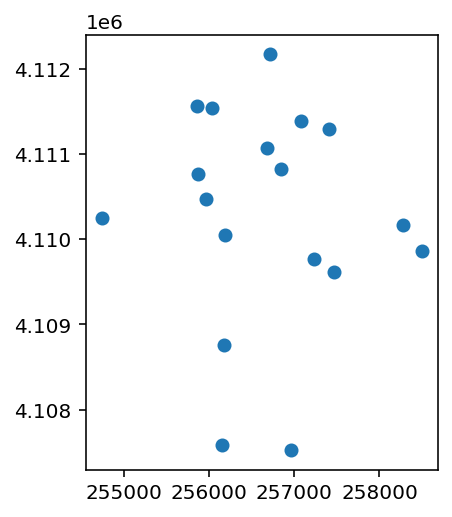

In [33]:
sjer_plot_locations.plot()

Specifying plot attributes can make the plot more readable and help it provide more informaiton by adding extra dimensions. We will use the following attributes

* column: the data attribute column that we want to plot
* categorical= True: set the plot to plot categorical data - in this case plot types.
* legend: to add a legend
* markersize: increase or decrease the size of the points or markers rendered on the plot
* cmap: set the colors used to plot the data


See how adding colors and a legend to the plot makes it provide more information.

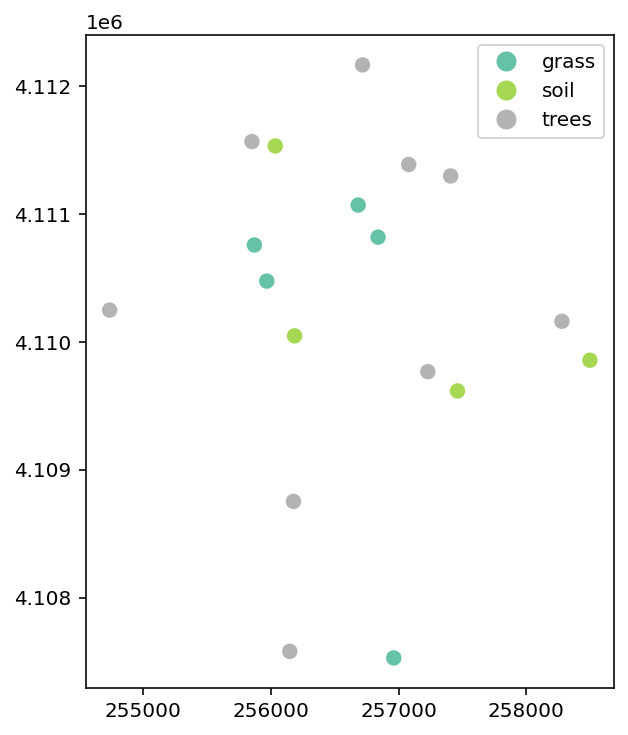

In [38]:
# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2")
                        
# Add a title
ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

Setting an axis object and a figure has its benefits, like adding a tittle, plotting different layers together, setting the axis and specifying the size of the output plot. 


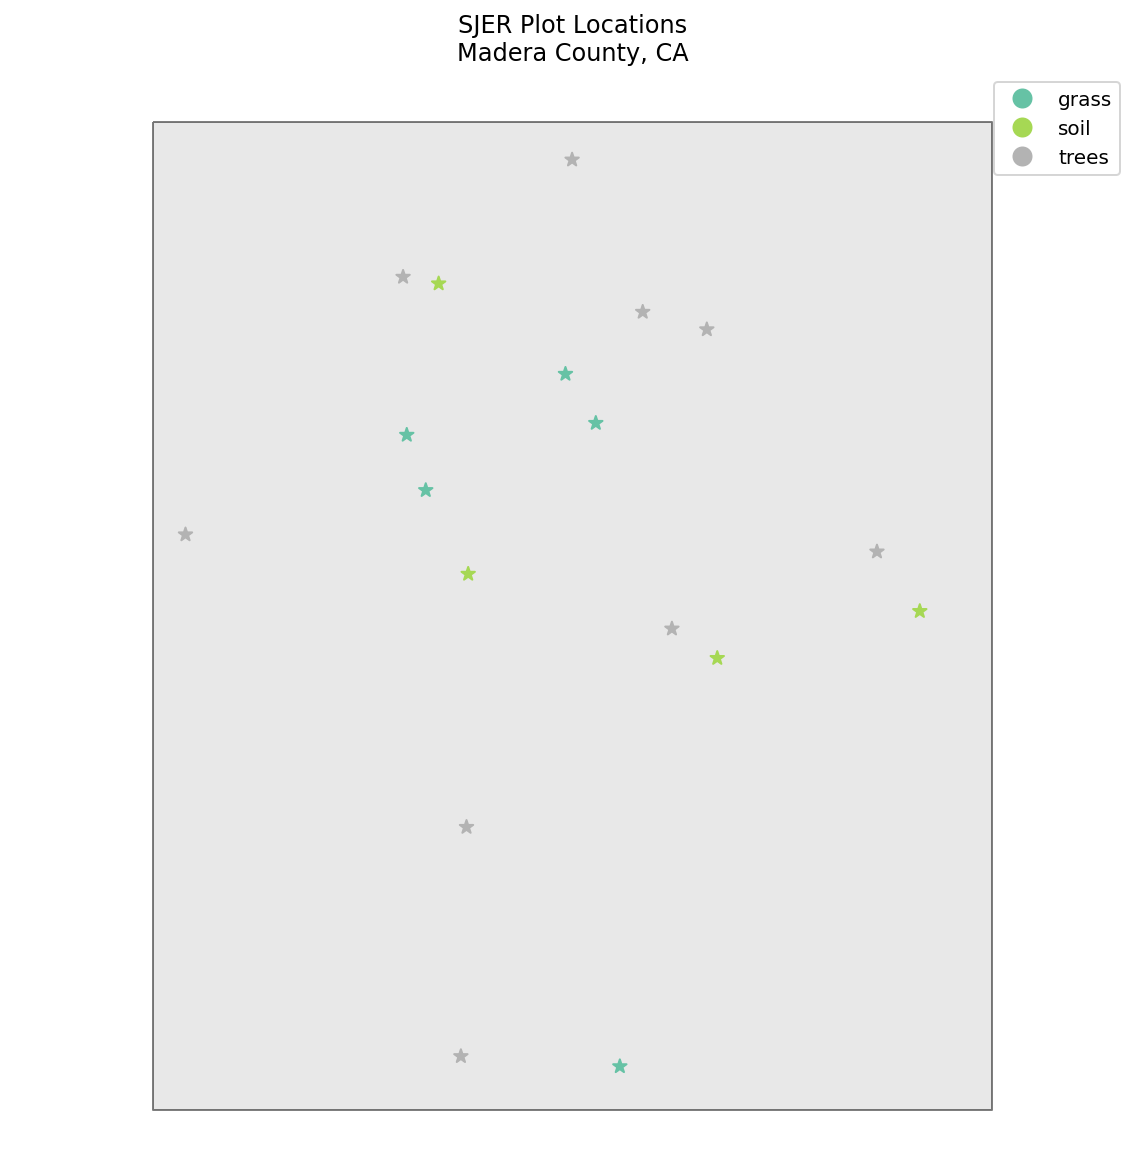

In [44]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

# setup figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

## Coordinate Reference System (CRS)

A CRS is defined to better understand how the projection from the 3D world into a 2D plane is made. The components of the CRS define the “flattening” of data that exists in a 3-D globe space. The CRS also defines the coordinate system itself and the translation between a lcoation on the round earth and the smae location on a flattened 2D coordinate system.